In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import re
import datetime
import folium
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame
import math
from folium.plugins import HeatMap, MarkerCluster
from folium import Marker,GeoJson,Choropleth, Circle

In [2]:
case = pd.read_csv('Case.csv')
pat_info = pd.read_csv('PatientInfo.csv')
policy = pd.read_csv('Policy.csv')
religion = pd.read_csv('Region.csv')
trend = pd.read_csv('SearchTrend.csv')
floating = pd.read_csv('SeoulFloating.csv')
time = pd.read_csv('Time.csv')
time_age = pd.read_csv('TimeAge.csv')
time_gender = pd.read_csv('TimeGender.csv')
time_prov = pd.read_csv('TimeProvince.csv')
weather = pd.read_csv('Weather.csv')

In [3]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='confirmed', ylabel='province'>

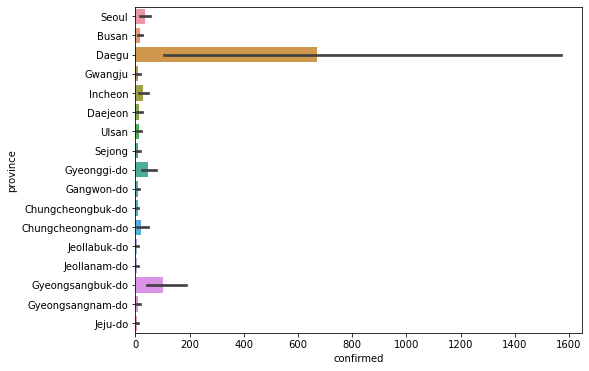

In [4]:
plt.figure(figsize = (8,6))
sns.barplot('confirmed','province', data = case)

A bar plot of confirmed cases and province shows Daegu as having the most number of cases

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='confirmed', ylabel='infection_case'>

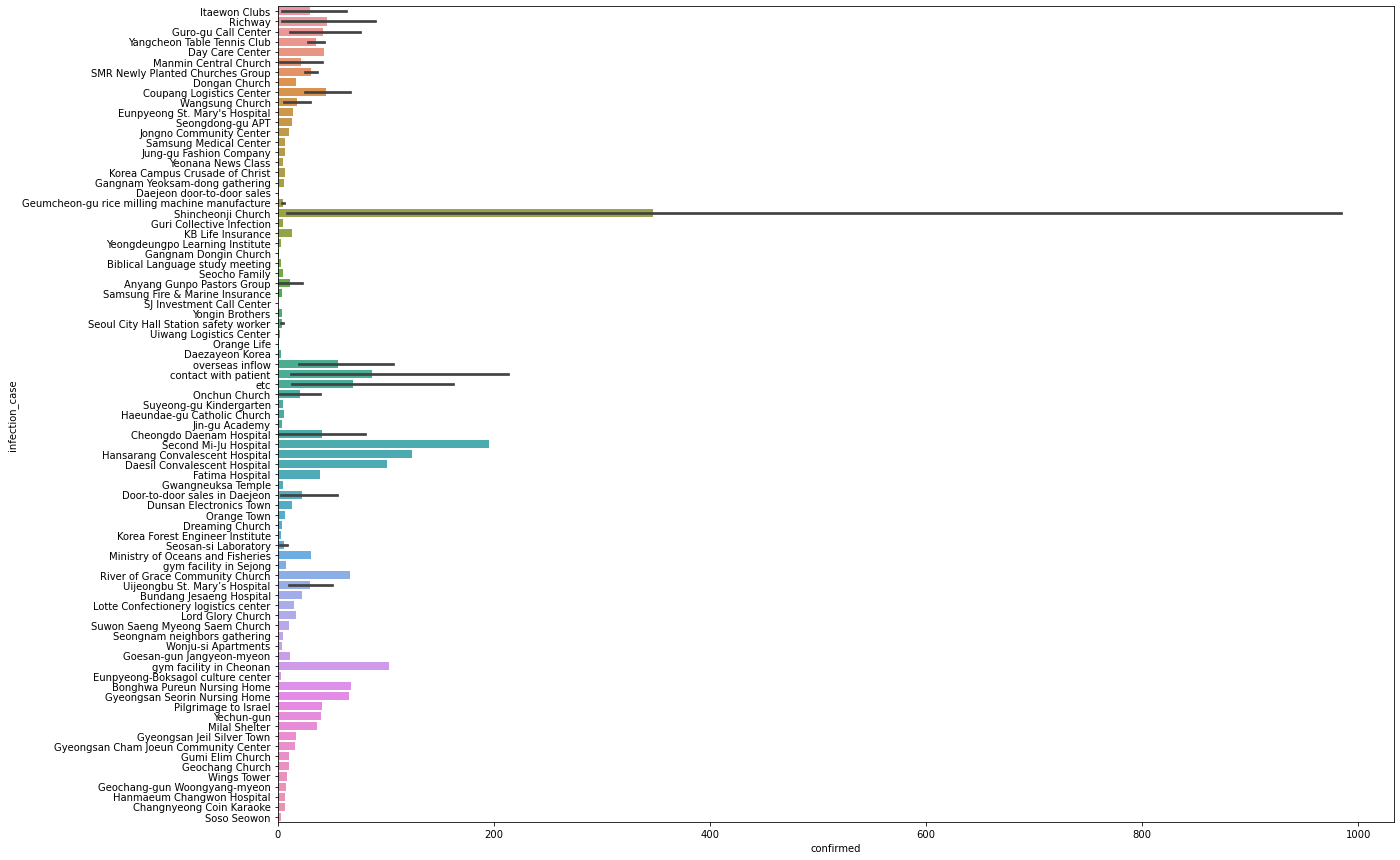

In [5]:
plt.figure(figsize = (20, 15)) 
sns.barplot('confirmed','infection_case', data = case)

Most of the infections happened in Shincheonji church, then the hospitals

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='confirmed', ylabel='city'>

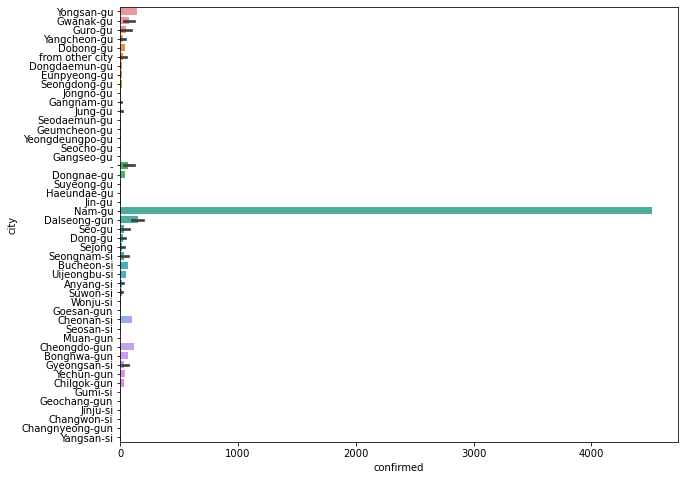

In [6]:
plt.figure(figsize = (10,8)) 
sns.barplot('confirmed','city', data = case)

Most infected city is Nam-gu

# To find out which province and city Shincheonji Church (the most infected place) is in I grouped the data by province, city and infection_case.

In [8]:
data = case.groupby(['province','city','infection_case']).sum()

In [9]:
pd.set_option('display.max_rows', data.shape[0]+1)
pd.set_option('display.max_columns', data.shape[0]+1)

In [10]:
data

case_id  \
province          city            infection_case                                            
Busan             -               contact with patient                            1100009   
                                  etc                                             1100010   
                                  overseas inflow                                 1100008   
                  Dongnae-gu      Onchun Church                                   1100001   
                  Haeundae-gu     Haeundae-gu Catholic Church                     1100004   
                  Jin-gu          Jin-gu Academy                                  1100005   
                  Suyeong-gu      Suyeong-gu Kindergarten                         1100003   
                  from other city Cheongdo Daenam Hospital                        1100007   
                                  Itaewon Clubs                                   1100006   
                                  Shincheonji Church                              1100002   
Chungcheongbuk-do -               contact with patient                            4000006   
                                  etc                                             4000007   
                                  overseas inflow                                 4000005   
                  Goesan-gun      Goesan-gun Jangyeon-myeon                       4000001   
                  from other city Guro-gu Call Center                             4000003   
                                  Itaewon Clubs                                   4000002   
                                  Shincheonji Church                              4000004   
Chungcheongnam-do -               contact with patient                            4100007   
                                  etc                                             4100008   
                                  overseas inflow                                 4100006   
                  Cheonan-si      gym facility in Cheonan                         4100001   
                  Seosan-si       Seosan-si Laboratory                            4100003   
                  from other city Door-to-door sales in Daejeon                   4100002   
                                  Eunpyeong-Boksagol culture center               4100005   
                                  Richway                                         4100004   
Daegu             -               contact with patient                            1200009   
                                  etc                                             1200010   
                                  overseas inflow                                 1200008   
                  Dalseong-gun    Daesil Convalescent Hospital                    1200004   
                                  Second Mi-Ju Hospital                           1200002   
                  Dong-gu         Fatima Hospital                                 1200005   
                  Nam-gu          Shincheonji Church                              1200001   
                  Seo-gu          Hansarang Convalescent Hospital                 1200003   
                  from other city Cheongdo Daenam Hospital                        1200007   
                                  Itaewon Clubs                                   1200006   
Daejeon           -               Door-to-door sales in Daejeon                   1500001   
                                  contact with patient                            1500009   
                                  etc                                             1500010   
                                  overseas inflow                                 1500008   
                  Seo-gu          Dreaming Church                                 1500004   
                                  Dunsan Electronics Town                         1500002   
                                  Korea Forest Engineer Institute                 1

Shincheonji Church is in the province of Daegu in the city of Nam-gu, all of which are the highest infected places

# Replacing True and False values in the column 'group' with integers

In [11]:
le = LabelEncoder()
case.group = le.fit_transform(case.group)

In [12]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,1,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,1,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,1,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,1,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,1,Day Care Center,43,37.679422,127.044374


/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='group', ylabel='province'>

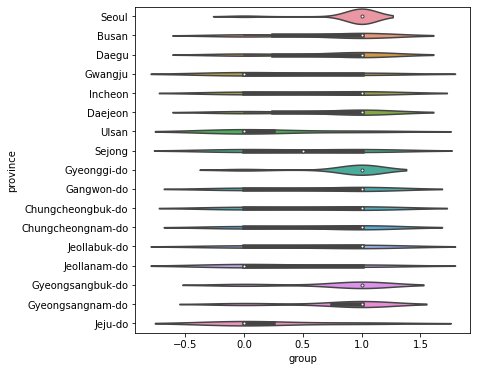

In [13]:
plt.figure(figsize = (6,6)) 
sns.violinplot('group', 'province',data = case)

In the provinces the majority of infection happened among groups

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 98.0% of the points cannot be placed; you may want to decrease the size of the marker

<AxesSubplot:xlabel='group', ylabel='city'>

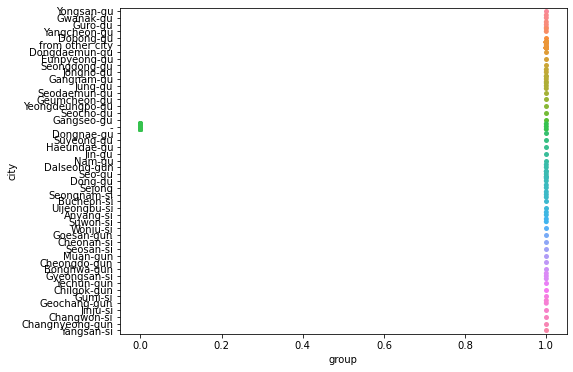

In [14]:
plt.figure(figsize = (8,6)) 
sns.swarmplot('group','city', data = case)

In the different cities, the infection also happened in groups

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the marker

<AxesSubplot:xlabel='group', ylabel='infection_case'>

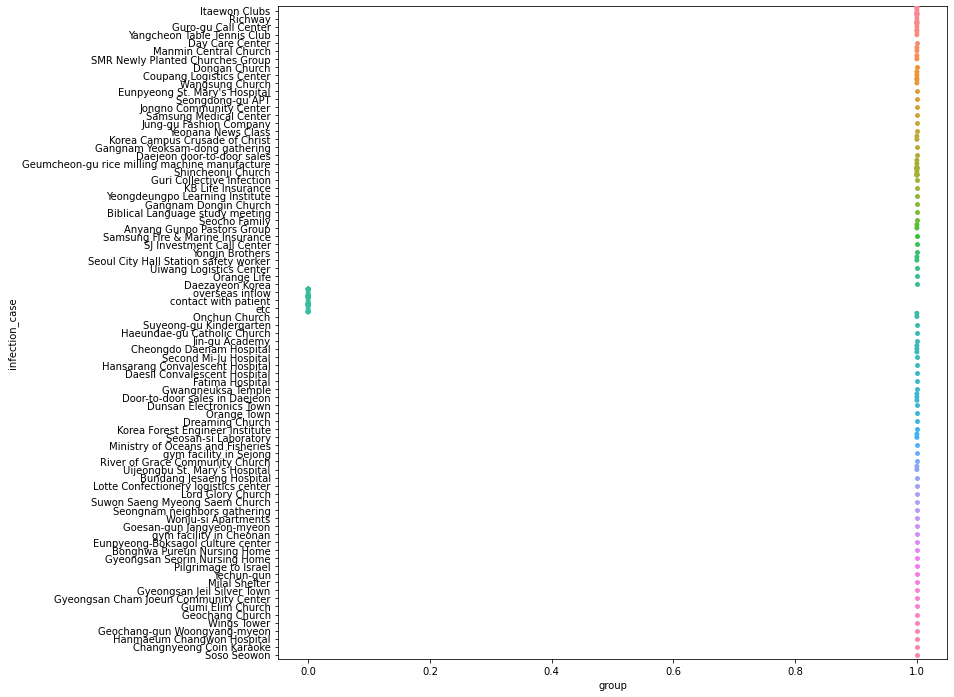

In [15]:
plt.figure(figsize = (12,12)) 

sns.swarmplot('group','infection_case', data = case)

In the various specific locations, the infections also happened in group. 
Most of the infection happened in groups rather than not

# Looking at the 'latitude' and 'longitude' columns to start prepping to plot a map

In [16]:
case.head(10)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,1,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,1,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,1,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,1,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,1,Day Care Center,43,37.679422,127.044374
5,1000006,Seoul,Guro-gu,1,Manmin Central Church,41,37.481059,126.894343
6,1000007,Seoul,from other city,1,SMR Newly Planted Churches Group,36,-,-
7,1000008,Seoul,Dongdaemun-gu,1,Dongan Church,17,37.592888,127.056766
8,1000009,Seoul,from other city,1,Coupang Logistics Center,25,-,-
9,1000010,Seoul,Gwanak-gu,1,Wangsung Church,30,37.481735,126.930121


# Converting it to numeric using this method changes the empty columns to 'NaN' columns

In [17]:
case.latitude = pd.to_numeric(case.latitude, errors='coerce')
case.longitude = pd.to_numeric(case.longitude, errors='coerce')

In [18]:
case.head(10)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,1,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,1,Richway,119,37.482080,126.901384
2,1000003,Seoul,Guro-gu,1,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,1,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,1,Day Care Center,43,37.679422,127.044374
5,1000006,Seoul,Guro-gu,1,Manmin Central Church,41,37.481059,126.894343
6,1000007,Seoul,from other city,1,SMR Newly Planted Churches Group,36,NaN,NaN
7,1000008,Seoul,Dongdaemun-gu,1,Dongan Church,17,37.592888,127.056766
8,1000009,Seoul,from other city,1,Coupang Logistics Center,25,NaN,NaN
9,1000010,Seoul,Gwanak-gu,1,Wangsung Church,30,37.481735,126.930121


In [19]:
case.dropna(axis = 0, inplace = True)

In [20]:
case.head(10)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,1,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,1,Richway,119,37.482080,126.901384
2,1000003,Seoul,Guro-gu,1,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,1,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,1,Day Care Center,43,37.679422,127.044374
5,1000006,Seoul,Guro-gu,1,Manmin Central Church,41,37.481059,126.894343
7,1000008,Seoul,Dongdaemun-gu,1,Dongan Church,17,37.592888,127.056766
9,1000010,Seoul,Gwanak-gu,1,Wangsung Church,30,37.481735,126.930121
10,1000011,Seoul,Eunpyeong-gu,1,Eunpyeong St. Mary's Hospital,14,37.633690,126.916500
11,1000012,Seoul,Seongdong-gu,1,Seongdong-gu APT,13,37.557130,127.040300


In [21]:
mp = folium.Map(location = [37.538621,126.992652], tiles = 'Stamen Terrain', zoom_start =7)
for i, row in case.iterrows():
    Marker([row['latitude'], row['longitude']], popup=row['confirmed']).add_to(mp)
    
mp

# Analyzing the second dataset: Patient Information

In [22]:
pat_info.head()  

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


# Checking the type of object in the released_date column

In [23]:
type(pat_info.released_date)

pandas.core.series.Series

In [24]:
pat_info.confirmed_date = pd.to_datetime(pat_info.confirmed_date, errors = 'coerce')

In [25]:
pat_info.released_date = pd.to_datetime(pat_info.released_date, errors = 'coerce')

In [26]:
pat_info['num_of_days_in_hospital'] = (pat_info['released_date'] - pat_info['confirmed_date'])

In [27]:
pat_info.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,num_of_days_in_hospital
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,13 days
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,32 days
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,20 days
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,16 days
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,24 days


In [28]:
pat_info.drop(['patient_id', 'infected_by','symptom_onset_date','confirmed_date','released_date','deceased_date'], 
              axis = 1, inplace = True)

In [29]:
pat_info.head()

,sex,age,country,province,city,infection_case,contact_number,state,num_of_days_in_hospital
0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,released,13 days
1,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,released,32 days
2,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17,released,20 days
3,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,released,16 days
4,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,released,24 days


# Replace the genders with integers

In [30]:
pat_info.sex.replace('male', 1, inplace = True)
pat_info.sex.replace('female', 0, inplace = True)

# Strip the 's' from the intergers in the age column

In [31]:
pat_info['age'] =  pat_info['age'].str.rstrip('s')

# Converting the age column from series to numeric

In [32]:
 pat_info['age'] =  pd.to_numeric( pat_info['age'])

In [33]:
pat_info.head()

,sex,age,country,province,city,infection_case,contact_number,state,num_of_days_in_hospital
0,1.0,50.0,Korea,Seoul,Gangseo-gu,overseas inflow,75,released,13 days
1,1.0,30.0,Korea,Seoul,Jungnang-gu,overseas inflow,31,released,32 days
2,1.0,50.0,Korea,Seoul,Jongno-gu,contact with patient,17,released,20 days
3,1.0,20.0,Korea,Seoul,Mapo-gu,overseas inflow,9,released,16 days
4,0.0,20.0,Korea,Seoul,Seongbuk-gu,contact with patient,2,released,24 days


In [34]:
pat_info.isna().sum()

sex                        1122
age                        1380
country                       0
province                      0
city                         94
infection_case              919
contact_number             4374
state                         0
num_of_days_in_hospital    3578
dtype: int64

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

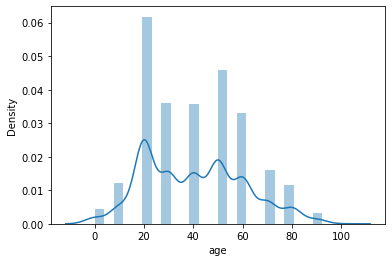

In [35]:
sns.distplot(pat_info['age']) # More people within the age of 20 and 60 were infected

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


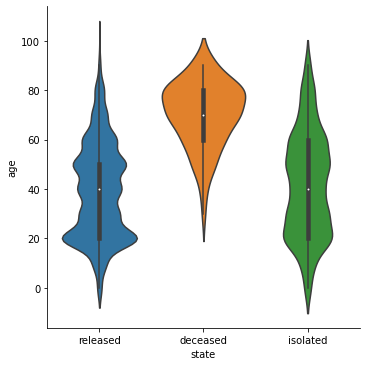

In [36]:
sns.catplot('state','age',  data = pat_info, kind = 'violin')

More older people died

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='sex'>

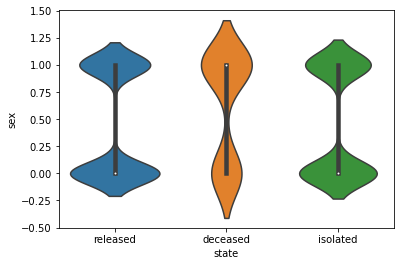

In [37]:
sns.violinplot('state','sex',data = pat_info)

Males, more than females, died. More females were isolated and released

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='country'>

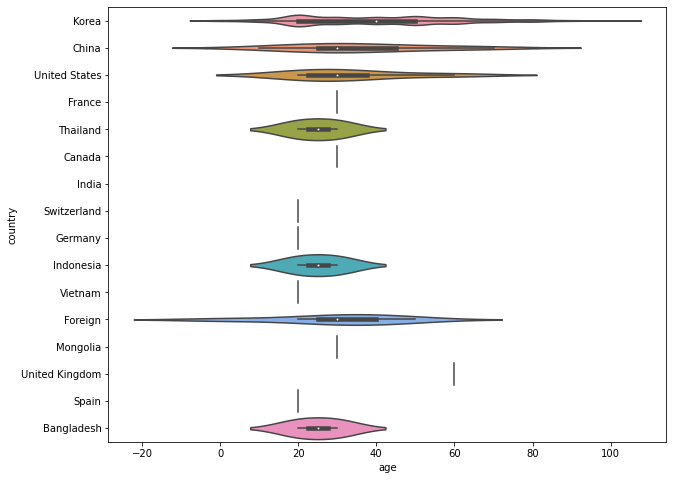

In [38]:
plt.figure(figsize = (10,8))
sns.violinplot('age', 'country', data = pat_info)

The median age distribution of the people infected different nations in South Korea is about 30

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='country'>

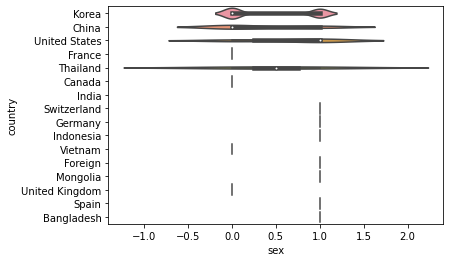

In [39]:
sns.violinplot('sex', 'country', data = pat_info)

There seem to be more males than females, from the different nations

In [40]:
pat_info['num_of_days_in_hospital'] = pat_info['num_of_days_in_hospital']/np.timedelta64(1, 'D')

In [41]:
pat_info.head()

,sex,age,country,province,city,infection_case,contact_number,state,num_of_days_in_hospital
0,1.0,50.0,Korea,Seoul,Gangseo-gu,overseas inflow,75,released,13.0
1,1.0,30.0,Korea,Seoul,Jungnang-gu,overseas inflow,31,released,32.0
2,1.0,50.0,Korea,Seoul,Jongno-gu,contact with patient,17,released,20.0
3,1.0,20.0,Korea,Seoul,Mapo-gu,overseas inflow,9,released,16.0
4,0.0,20.0,Korea,Seoul,Seongbuk-gu,contact with patient,2,released,24.0


# The distribution of the number of days in the hospital.

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_of_days_in_hospital', ylabel='Density'>

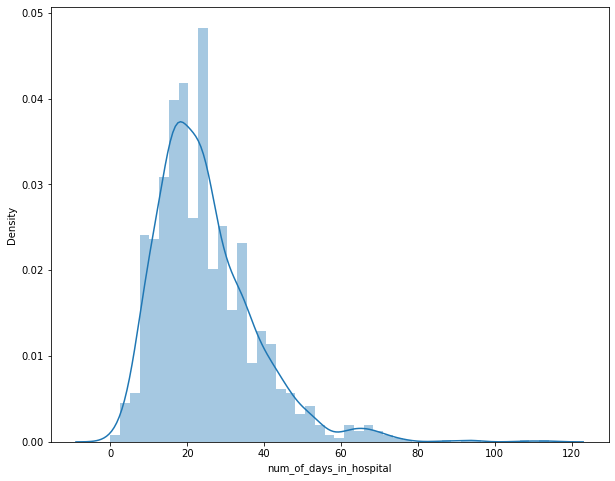

In [42]:
plt.figure(figsize = (10,8))
sns.distplot(pat_info['num_of_days_in_hospital'])

On average, it's about 20days

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='num_of_days_in_hospital'>

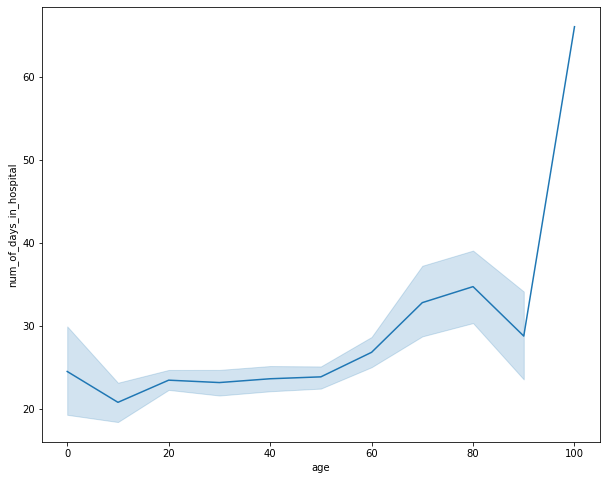

In [43]:
plt.figure(figsize = (10,8))
sns.lineplot('age','num_of_days_in_hospital',  data = pat_info)

Generally, the greater the age the greater the number of days in the hospital

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_days_in_hospital', ylabel='infection_case'>

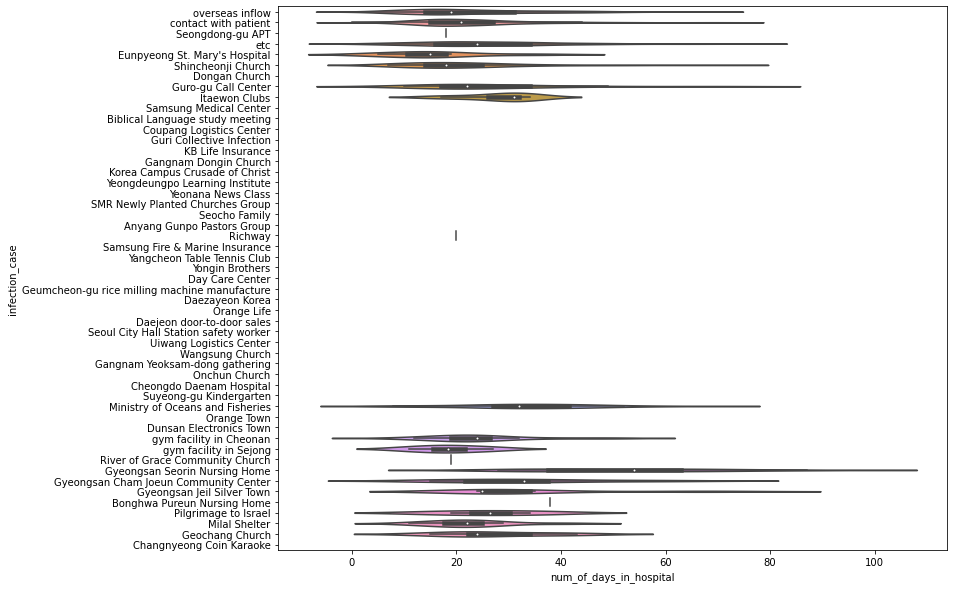

In [44]:
plt.figure(figsize = (12,10))
sns.violinplot('num_of_days_in_hospital','infection_case', data = pat_info)

Not every place had hospitilizations, and those that did the longest stay came from the Gyeonsang Seorin Nursing Home

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='num_of_days_in_hospital'>

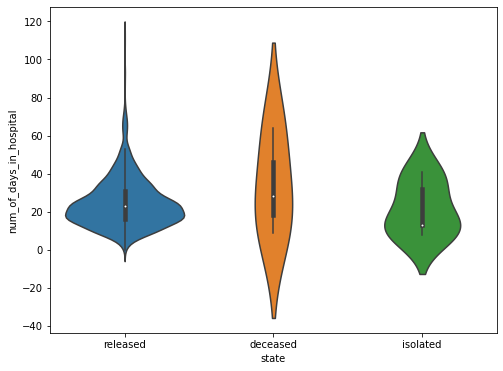

In [45]:
plt.figure(figsize = (8,6))
sns.violinplot('state','num_of_days_in_hospital',data = pat_info)

Those who were isolated were released from the hospital sooner. Those who died stayed in the hospital the longest.

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='num_of_days_in_hospital'>

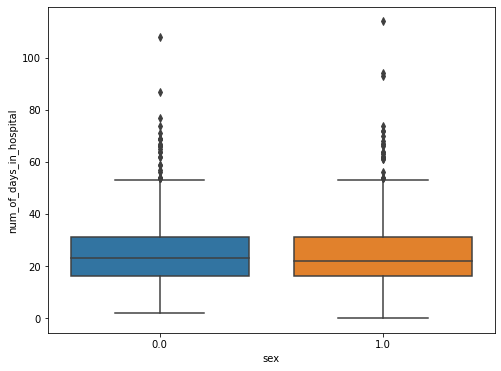

In [46]:
plt.figure(figsize = (8,6))
sns.boxplot('sex','num_of_days_in_hospital',data = pat_info)

Gender didn't really determine the length of stay in the hospital

In [47]:
pat_info.state.replace('released', 2, inplace = True)
pat_info.state.replace('isolated', 1, inplace = True)
pat_info.state.replace('deceased', 0, inplace = True)

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='country'>

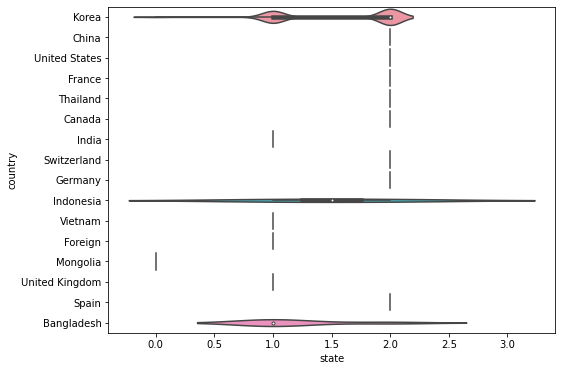

In [48]:
plt.figure(figsize = (8,6))
sns.violinplot('state','country',data = pat_info)

Most of the deceased came from Mongolia; the rest of the countries were either isolated or released

In [49]:
type(pat_info.contact_number)

pandas.core.series.Series

In [50]:
pat_info.contact_number = pd.to_numeric(pat_info.contact_number,errors='coerce') #converting it into numeric

In [51]:
pat_info['contact_number'].head(20)

0      75.0
1      31.0
2      17.0
3       9.0
4       2.0
5      43.0
6       0.0
7       0.0
8      68.0
9       6.0
10     23.0
11      0.0
12    117.0
13     27.0
14      8.0
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
Name: contact_number, dtype: float64

In [52]:
pat_info.dropna(axis = 0, inplace =True)

In [53]:
pat_info['contact_number'].head(20)

0       75.0
1       31.0
2       17.0
3        9.0
4        2.0
5       43.0
6        0.0
7        0.0
8       68.0
9        6.0
10      23.0
11       0.0
13      27.0
1987    23.0
1988     9.0
1989     1.0
1990    46.0
1991    15.0
1992    12.0
1993     2.0
Name: contact_number, dtype: float64

# Distribution of the number of people contacted

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='contact_number', ylabel='Density'>

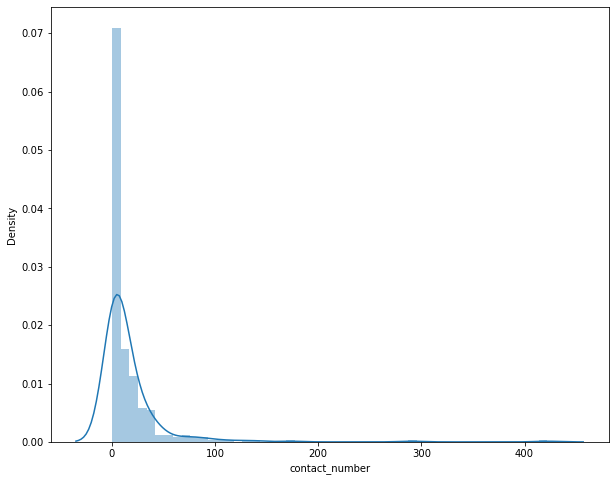

In [54]:
plt.figure(figsize = (10,8))
sns.distplot(pat_info['contact_number'])

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='contact_number'>

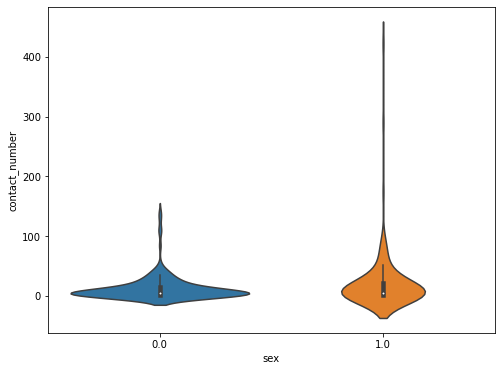

In [55]:
plt.figure(figsize = (8,6)) 
sns.violinplot('sex','contact_number', data = pat_info)

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='contact_number'>

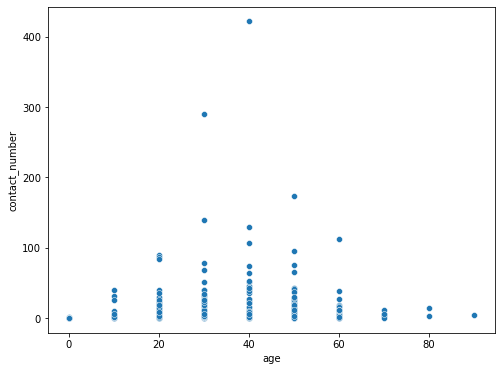

In [56]:
plt.figure(figsize = (8,6))
sns.scatterplot('age','contact_number', data = pat_info)

There's a bell curve with the age and the contact number

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_days_in_hospital', ylabel='contact_number'>

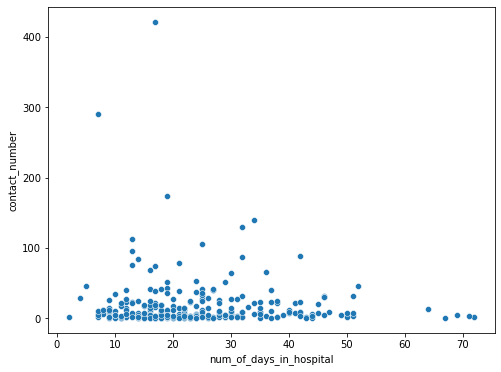

In [57]:
plt.figure(figsize = (8,6))
sns.scatterplot('num_of_days_in_hospital','contact_number', data = pat_info)

There's no trend that's observed with the number of days in the hospital verses contact number

In [58]:
pat_info.head()

,sex,age,country,province,city,infection_case,contact_number,state,num_of_days_in_hospital
0,1.0,50.0,Korea,Seoul,Gangseo-gu,overseas inflow,75.0,2,13.0
1,1.0,30.0,Korea,Seoul,Jungnang-gu,overseas inflow,31.0,2,32.0
2,1.0,50.0,Korea,Seoul,Jongno-gu,contact with patient,17.0,2,20.0
3,1.0,20.0,Korea,Seoul,Mapo-gu,overseas inflow,9.0,2,16.0
4,0.0,20.0,Korea,Seoul,Seongbuk-gu,contact with patient,2.0,2,24.0


/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contact_number', ylabel='infection_case'>

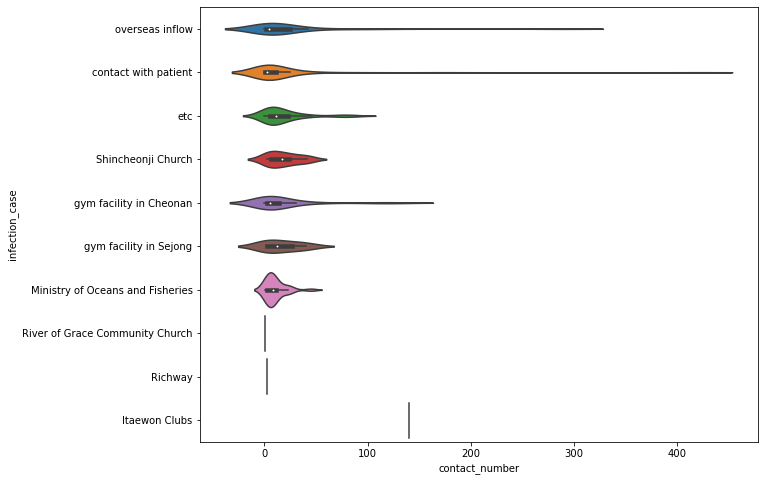

In [59]:
plt.figure(figsize = (10,8))
sns.violinplot('contact_number','infection_case', data = pat_info)

Highest contact happened in the clubs

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='contact_number'>

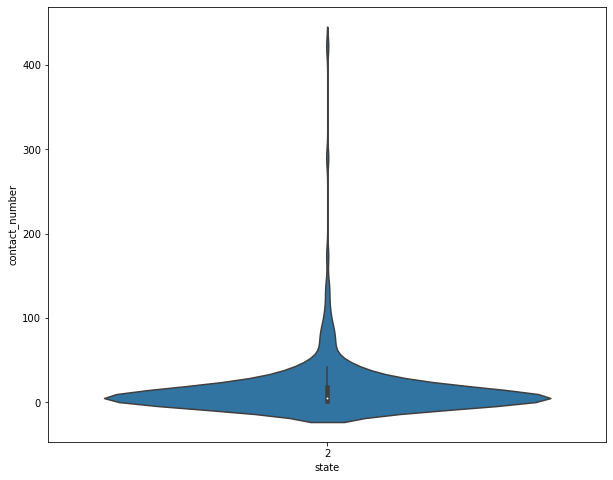

In [60]:
plt.figure(figsize = (10,8))
sns.violinplot('state','contact_number', data = pat_info)

In [61]:
pat_info.state.value_counts()

2    304
Name: state, dtype: int64

Confirmed the types of values in the 'state' column, and it does show only 2